<a href="https://colab.research.google.com/github/Prad0510/Learning-MachineVision/blob/main/MVision3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pradnya Dhengale   23102C0007

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse


In [ ]:
from google.colab import files
uploaded = files.upload()

image = cv2.imread(list(uploaded.keys())[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Saving images.jpg to images.jpg


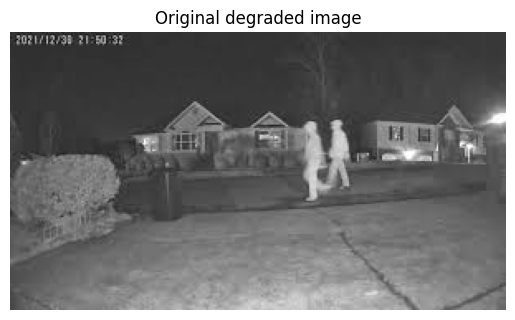

In [ ]:
plt.imshow(image, cmap='gray')
plt.title("Original degraded image")
plt.axis('off')
plt.show()

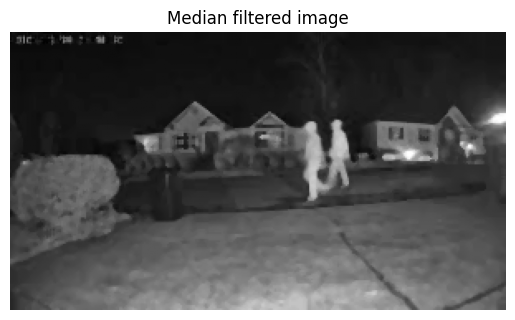

In [ ]:
median_img = cv2.medianBlur(image, 3)
plt.imshow(median_img, cmap='gray')
plt.title("Median filtered image")
plt.axis('off')
plt.show()

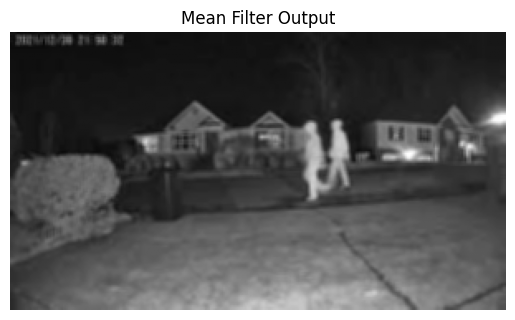

In [ ]:
mean_img = cv2.blur(image, (3,3))

plt.imshow(mean_img, cmap='gray')
plt.title("Mean Filter Output")
plt.axis('off')
plt.show()

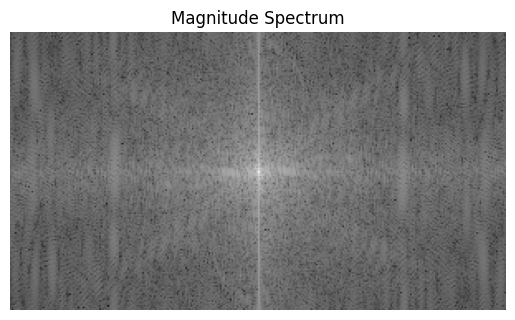

In [ ]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()

Converting image to float

In [ ]:
import numpy as np
img_float = np.float32(image)

In [ ]:
G = np.fft.fft2(img_float)
G_shift = np.fft.fftshift(G)
k = 0.01

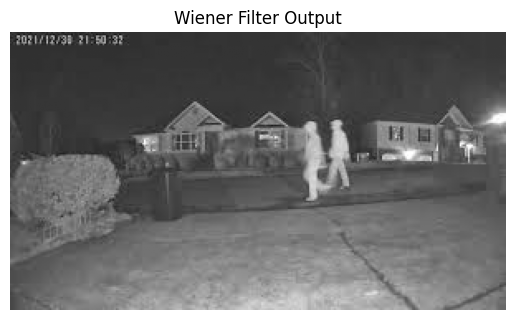

In [ ]:
H = np.ones_like(G_shift)
Weiner = np. conj(H) / (np.abs(H) ** 2 + k)
F_hat = Weiner * G_shift

F_ishift = np.fft.ifftshift(F_hat)
restored = np.fft.ifft2(F_ishift)
restored = np.abs(restored)

restored = cv2.normalize(restored,None, 0, 255, cv2.NORM_MINMAX)
restored = np.uint8(restored)

plt.imshow(restored, cmap='gray')
plt.title("Wiener Filter Output")
plt.axis('off')
plt.show()

In [ ]:
def evaluate(original, restored, name):
    print(name)
    print("MSE :", mse(original, restored))
    print("PSNR:", psnr(original, restored))
    print("SSIM:", ssim(original, restored))
    print("---------------------")

evaluate(image, median_img, "Median Filter")
evaluate(image, mean_img, "Mean Filter")
evaluate(image, restored, "Wiener Filter")

Median Filter
MSE : 56.51218253968254
PSNR: 30.609382804920287
SSIM: 0.9261709701799788
---------------------
Mean Filter
MSE : 60.7705753968254
PSNR: 30.29387012450771
SSIM: 0.9125909371655109
---------------------
Wiener Filter
MSE : 1.0
PSNR: 48.1308036086791
SSIM: 0.9999190601999923
---------------------
